# 线性回归模型

## 简介：计量模型的设定思路

![w:900](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20221209091907.png)

>**核心思想**

- 从 $y$ 的分布特征入手
- 确定分析的重点：均值，中位数，还是尾部、波动率、取值区间？
- 设定 $y = f(x, \beta)$ 的函数形式
  - 变量筛选
  - 模型筛选
- 统计推断：**Population** &rarr; **Sample**
  - 估计参数 $\alpha$ &rarr; 假设检验
- 应用：解释 / 因果推断 / 预测 / 可视化


## 线性模型的设定

::: {.callout-tip}
### 提示词

模拟一份数据，Python 代码。代码尽可能简洁：
1. N = 11, seed = 42
2. x (Income) - 收入, 取值范围 5-15w；
3. y (Consum)：y~5 + 0.5x + e, e ~ N(0, 1)
4. 绘制散点图+拟合线
5. 使用 statsmodels 进行线性回归分析，输出结果
6. 不显示 warnings
:::

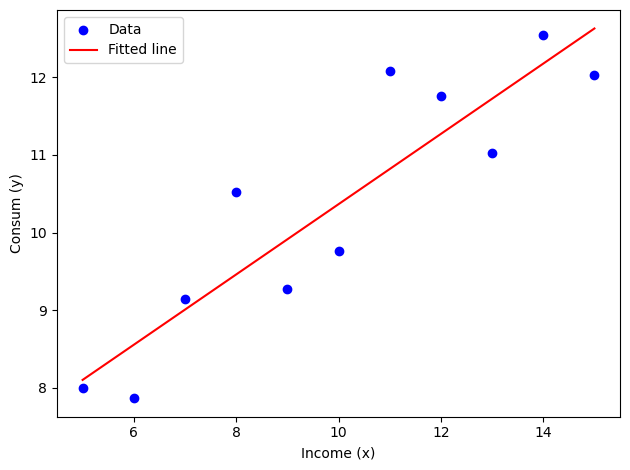

       x          y
0    5.0   7.996714
1    6.0   7.861736
2    7.0   9.147689
3    8.0  10.523030
4    9.0   9.265847
5   10.0   9.765863
6   11.0  12.079213
7   12.0  11.767435
8   13.0  11.030526
9   14.0  12.542560
10  15.0  12.036582
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     38.98
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           0.000151
Time:                        01:37:18   Log-Likelihood:                -11.510
No. Observations:                  11   AIC:                             27.02
Df Residuals:                       9   BIC:                             27.82
Df Model:                           1                                         
Covariance Type:            nonrobust            

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

# 1. 设置参数
N = 11
np.random.seed(42)

# 2. 生成数据
x = np.linspace(5, 15, N)
e = np.random.normal(0, 1, N)
y = 5 + 0.5 * x + e

# 3. 整理为 DataFrame
df = pd.DataFrame({'x': x, 'y': y})

# 4. 绘制散点图和拟合线
plt.scatter(x, y, color='blue', label='Data')
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
plt.plot(x, model.fittedvalues, color='red', label='Fitted line')
plt.xlabel('Income (x)')
plt.ylabel('Consum (y)')
plt.legend()
plt.tight_layout()
plt.show()

# 5. 数据
print(df)

# 5. 输出回归结果
print(model.summary())

## 二元线性回归模型


### 基本模型设定

二元线性回归模型（Simple Linear Regression）是统计学和计量经济学中最基础、最常用的回归分析方法之一。该模型用于分析一个自变量（解释变量、预测变量）对一个因变量（被解释变量、响应变量）的线性影响关系。其基本形式如下：

$$
y_i = \alpha_0 + \beta x_i + \varepsilon_i,\quad i = 1,2,\ldots,n
$$

* $y_i$：第 $i$ 个观测的因变量
* $x_i$：第 $i$ 个观测的自变量
* $\alpha_0$：截距项，表示当 $x_i=0$ 时 $y_i$ 的期望值
* $\beta$：斜率系数，表示 $x$ 每变动一个单位，$y$ 的期望变化量
* $\varepsilon_i$：误差项，反映未被 $x$ 解释的其他随机因素

**经济学解释**

* **截距 $\alpha_0$**：当 $x_i = 0$ 时，$y_i$ 的理论预测值。其经济意义有时并不直接，但有助于模型的整体拟合。
* **斜率 $\beta$**：描述 $x$ 变动对 $y$ 的边际影响。例如，若 $x$ 为受教育年限，$y$ 为工资，则 $\beta$ 代表教育每增加一年工资的平均增量。

### 估计方法

常用的估计方法为最小二乘法（Ordinary Least Squares, OLS），其核心思想是找到一组参数 $\hat{\alpha}_0, \hat{\beta}$，使得所有观测值的残差平方和最小：

$$
\min_{\alpha_0, \beta} \sum_{i=1}^n (y_i - \alpha_0 - \beta x_i)^2
$$

由此可以推导出参数的显式解：

$$
\hat{\beta} = \frac{\sum_{i=1}^n (x_i - \bar{x})(y_i - \bar{y})}{\sum_{i=1}^n (x_i - \bar{x})^2}
$$

$$
\hat{\alpha}_0 = \bar{y} - \hat{\beta} \bar{x}
$$

其中，$\bar{x}$ 和 $\bar{y}$ 分别为 $x_i$ 和 $y_i$ 的样本均值。

### 经典假设条件

为了确保 OLS 估计量具有良好的统计性质（如无偏性、一致性、有效性），我们通常需要满足以下经典假设：

* 线性关系：$y$ 与 $x$ 之间为线性关系
* 随机抽样：样本为独立同分布的随机抽样
* 同方差性：$Var(\varepsilon_i|x_i) = \sigma^2$，即误差项方差不随 $x$ 变化
* 零条件均值：$E(\varepsilon_i|x_i) = 0$
* 误差项独立：各个 $\varepsilon_i$ 相互独立


## 虚拟变量

本例模拟了两个组（blue 和 red）的收入 $x$ 与消费 $y$：

* **自变量 $x$ 的生成：**

  * blue 组：$x$ 在 $[5, 10]$ 之间均匀分布，并加上正态噪声
  * red 组：$x$ 在 $[8, 14]$ 之间均匀分布，并加上正态噪声

* **因变量 $y$ 的生成：**

  * blue 组：$y = 2 + 0.3x + \varepsilon$，$\varepsilon \sim N(0, 0.5^2)$
  * red 组：$y = 1 + 0.7x + \varepsilon$，$\varepsilon \sim N(0, 0.5^2)$

**模型结构总结：**

$$
y_i = 
\begin{cases}
2 + 0.3x_i + \varepsilon_i, & \text{if } group_i = \text{blue} \\
1 + 0.7x_i + \varepsilon_i, & \text{if } group_i = \text{red}
\end{cases}
$$

该设定下，两组不仅截距不同，斜率也不同，体现了典型的“变截距 + 变斜率”分组回归结构。


::: {.callout-tip}
### 提示词

模拟一份数据，Python 代码。代码尽可能简洁：
1. N = 11 
2. x - 收入, 取值范围 5-15w；
3. y-消费：蓝色组 y~4 + 0.4x  ；红色组 y~6+ 0.6x，两个组的 x 取值大概有 30% 左右的重叠区域
4. y ~ x 的整体关系看起来有点非线性的特征，但蓝色组和红色组组内基本上线性关系
5. 我随后会用这份数据演示模型设定的思想：可以做全样本线型模型；子样本线型模型，也可以采用 regression tree ，或者非参数估计
:::

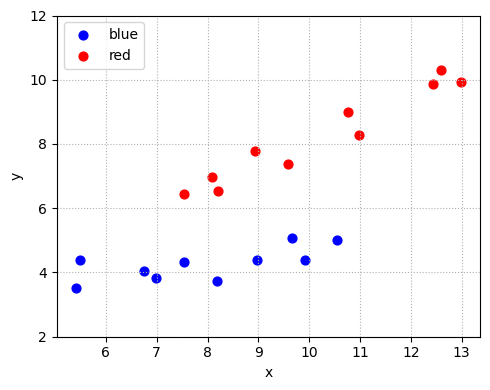

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 设置随机种子
np.random.seed(42)

# 样本容量
N = 20

# 分组索引：前一半为蓝色组，后一半为红色组
group = np.array(["blue"] * (N // 2) + ["red"] * (N - N // 2))

# 收入 x（单位：万元），两个组略有重叠
x_blue = np.linspace(5, 10, N // 2) + np.random.normal(0, 1, N // 2)
x_red = np.linspace(8, 14, N - N // 2) + np.random.normal(0, 1, N - N // 2)
x = np.concatenate([x_blue, x_red])

# 消费 y：
y = np.where(group == "blue",
             2 + 0.3*x + np.random.normal(0, 0.5, N),
             1 + 0.7*x + np.random.normal(0, 0.5, N))

# 打包为 DataFrame，便于建模
df = pd.DataFrame({"x": x, "y": y, "group": group})

# 画散点图
colors = {"blue": "blue", "red": "red"}
plt.figure(figsize=(5, 4))
for g in df["group"].unique():
    sub = df[df["group"] == g]
    plt.scatter(sub["x"], sub["y"], color=colors[g], label=g, s=40)
plt.xlabel("x")
plt.ylabel("y")
plt.ylim(2, 12)
plt.legend(loc="upper left")
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()



### 虚拟变量的基本概念

**虚拟变量**是一种特殊的变量形式，通常只取 $0$ 或 $1$ 两个数值，用于表示分类变量的不同类别。例如，对于分组变量 group，如果有 "blue" 和 "red" 两组，我们可以用一个虚拟变量 $D$ 表示 "red" 组：

$$
D_i =
\begin{cases}
1, & \text{如果第 $i$ 个观测属于 red 组} \\
0, & \text{如果第 $i$ 个观测属于 blue 组}
\end{cases}
$$

这样一来，类别型变量就可以与数值型变量一同进入回归分析。

### 只有虚拟变量的模型（组均值差异）

只检验不同组的均值是否存在差异：

$$
y_i = \alpha_0 + \theta D_i + \varepsilon_i
$$

* $D_i = 1$：red 组，$D_i = 0$：blue 组

根据 $D$ 的取值，模型可以分解为：

$$
y_i =   \begin{cases}
\alpha_0 + \varepsilon_i, & \text{如果 } D_i = 0 \text{ (blue 组)} \\
\alpha_0 + \theta + \varepsilon_i, & \text{如果 } D_i = 1 \text{ (red 组)}
\end{cases}
$$


* $\alpha_0$：blue 组均值
* $\alpha_1 = \alpha_0+\theta$：red 组均值
* $\theta$：red 组相对于 blue 组的均值差异

图示如下：

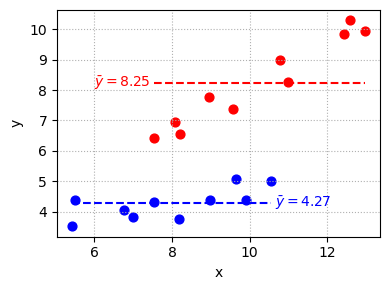

In [15]:
import matplotlib.pyplot as plt

# 分组计算均值和横轴范围
grouped = df.groupby("group")
means = grouped["y"].mean()
x_ranges = grouped["x"].agg(["min", "max"])

# 绘图
plt.figure(figsize=(4, 3))
for g, color in zip(["blue", "red"], ["blue", "red"]):
    d = df[df["group"] == g]
    plt.scatter(d["x"], d["y"], color=color, s=40)
    # 水平线
    y_mean = means[g]
    x_start, x_end = x_ranges.loc[g]
    plt.hlines(y_mean, x_start, x_end, colors=color, linestyles="--")
    # 标注均值
    if g == "red":
        plt.text(x_start - 0.1, y_mean, f"$\\bar{{y}} = {y_mean:.2f}$",
                 color=color, va='center', fontsize=10, ha='right')
    else:  # blue
        plt.text(x_end + 0.1, y_mean, f"$\\bar{{y}} = {y_mean:.2f}$",
                 color=color, va='center', fontsize=10, ha='left')

# 美化
plt.xlabel("x"); plt.ylabel("y")
plt.grid(True, linestyle=":")
plt.tight_layout()
plt.show()


In [ ]:

import statsmodels.formula.api as smf

# 生成虚拟变量 D_red
df['D_red'] = (df['group'] == 'red').astype(int)

# 拟合只有 dummy 的模型
model1 = smf.ols('y ~ D_red', data=df).fit()
print(model1.params.round(2))


Intercept    4.27
D_red        3.97
dtype: float64



### 变截距模型（平行回归线）

引入自变量 $x$，假定两组斜率相同，仅截距不同：

$$
y_i = \alpha_0 + \beta x_i + \thea D_i + \varepsilon_i
$$


* $\alpha_0$：blue 组截距
* $\beta$：x 对 y 的边际效应（所有组一致）
* $\theta$：red 组相对于 blue 组的截距差异
* red 组的回归方程：$y = (\alpha_0+\theta) + \beta x + \varepsilon$


In [17]:
import statsmodels.formula.api as smf

# 变截距模型：y ~ x + D_red
model2 = smf.ols('y ~ x + D_red', data=df).fit()
print(model2.params.round(3))

Intercept    0.493
x            0.476
D_red        2.897
dtype: float64


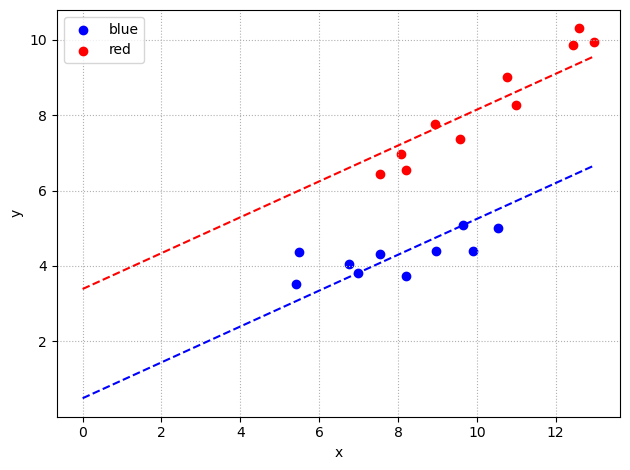

In [22]:
import numpy as np

import matplotlib.pyplot as plt

x_pred = np.linspace(0, df['x'].max(), 100)
for name, group_val in zip(['blue', 'red'], [0, 1]):
    if group_val == 0:
        y_pred = model2.params['Intercept'] + model2.params['x'] * x_pred
    else:
        y_pred = (model2.params['Intercept'] + model2.params['D_red']) + model2.params['x'] * x_pred
    plt.scatter(df[df['group'] == name]['x'], df[df['group'] == name]['y'], color=colors[name], label=name)
    plt.plot(x_pred, y_pred, color=colors[name], linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

### 变截距 + 变斜率模型（允许斜率也异质）

进一步放宽假设，允许不同组别不仅截距不同，$x$ 对 $y$ 的斜率也可以随组别而异。此时，我们在模型中引入自变量 $x$、虚拟变量 $D$ 及它们的交互项：

$$
y_i = \alpha_0 + \beta x_i + \theta D_i + \gamma (x_i \times D_i) + \varepsilon_i
$$

* $\alpha_0$：blue 组截距
* $\beta$：blue 组中 $x$ 对 $y$ 的边际效应
* $\theta$：red 组相对于 blue 组的**截距差异**
* $\gamma$：red 组相对于 blue 组的**斜率差异**（即斜率的“变差”）

对两组分别展开：

* **blue 组**（$D_i=0$）：

  $$
  y_i = \alpha_0 + \beta x_i + \varepsilon_i
  $$

* **red 组**（$D_i=1$）：

  $$
  y_i = (\alpha_0 + \theta) + (\beta + \gamma) x_i + \varepsilon_i
  $$

**解释：**

* $\theta$ 控制了 red 组与 blue 组在 $x=0$ 时的基准差异（截距差）；
* $\gamma$ 反映了 red 组相较于 blue 组，$x$ 对 $y$ 的边际影响是否存在异质性（斜率差）。

**Python 实现示例：**

* `D_red`：red 组虚拟变量
* `x:D_red`：交互项（x 与 D_red 的乘积），反映斜率差异

模型输出中的各参数，可直接用于上述两组回归方程的具体表达和解释。



In [24]:

import statsmodels.formula.api as smf

# 交互项自动生成
model3 = smf.ols('y ~ x + D_red + x:D_red', data=df).fit()
print(model3.params.round(3))


Intercept    2.691
x            0.199
D_red       -1.564
x:D_red      0.498
dtype: float64


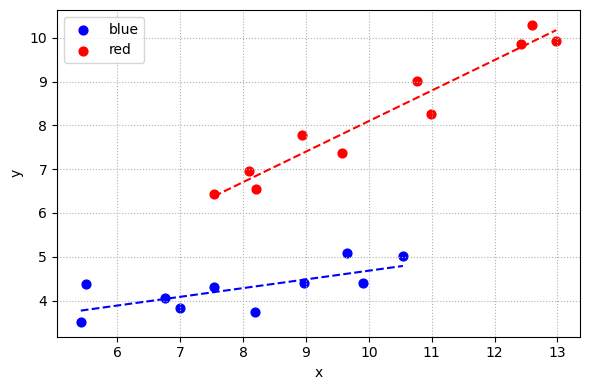

In [26]:
# 提示词：图示 model3 = smf.ols('y ~ x + D_red + x:D_red', data=df).fit()

plt.figure(figsize=(6, 4))
for name, group_val in zip(['blue', 'red'], [0, 1]):
    x_group = df[df['group'] == name]['x']
    y_group = df[df['group'] == name]['y']
    plt.scatter(x_group, y_group, color=colors[name], label=name, s=40)
    # 预测线
    x_line = np.linspace(x_group.min(), x_group.max(), 100)
    if group_val == 0:
        y_line = model3.params['Intercept'] + model3.params['x'] * x_line
    else:
        y_line = (model3.params['Intercept'] + model3.params['D_red']) + \
                 (model3.params['x'] + model3.params['x:D_red']) * x_line
    plt.plot(x_line, y_line, color=colors[name], linestyle='--')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True, linestyle=':')
plt.tight_layout()
plt.show()

### 结果对比

回顾一下原数据生成过程：

$$
y_i = 
\begin{cases}
2 + 0.3x_i + \varepsilon_i, & \text{if } group_i = \text{blue} \\
1 + 0.7x_i + \varepsilon_i, & \text{if } group_i = \text{red}
\end{cases}
$$

本例中，由于样本数较小，模型估计结果可能会有较大波动，但总体趋势应与原始数据生成过程一致。有兴趣的读者可以尝试改变样本量，观察模型估计的稳定性。比如，将样本量从 11 增加到 100 或 1000，看看估计结果是否更接近真实生成过程。

::: {.callout-tip}
### 提示词

使用 summary_col 汇总 model1-model3 的估计结果。最后几行呈现 R2 和 RSS 的结果；
:::

In [34]:
from statsmodels.iolib.summary2 import summary_col
import numpy as np

# 汇总 model1, model2, model3 的主要回归结果
results_table = summary_col(
    [model1, model2, model3],
    stars=True,
    float_format='%0.2f',
    model_names=['Model1', 'Model2', 'Model3'],
    info_dict={
        'R2': lambda x: f"{x.rsquared:.2f}",
        'RSS': lambda x: f"{np.sum(x.resid**2):.2f}"
    }
)

print(results_table)


                Model1  Model2  Model3
--------------------------------------
Intercept      4.27*** 0.49    2.69***
               (0.34)  (0.63)  (0.57) 
D_red          3.97*** 2.90*** -1.56* 
               (0.49)  (0.32)  (0.86) 
x                      0.48*** 0.20** 
                       (0.08)  (0.07) 
x:D_red                        0.50***
                               (0.09) 
R-squared      0.79    0.94    0.98   
R-squared Adj. 0.77    0.93    0.97   
R2             0.79    0.94    0.98   
RSS            21.40   6.38    2.31   
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


### Python 中多模型回归结果汇总的常用方法

在 Python 的回归分析中，我们通常希望像 Stata 的 `esttab`、`outreg2` 那样，将多个回归模型的估计结果汇总为一张清晰的表格，便于对比和展示。除了 `statsmodels` 包自带的 `summary_col` 方法外，实际分析中还有如下常见选择：

* **Stargazer**：
  `stargazer` 包模仿了 R 语言和 Stata 的经典结果汇总表格，支持输出 LaTeX 和 HTML 格式，适合论文写作和可视化展示。它可以横向排列多个模型，并自动添加星号、样本量、R 方等统计信息。安装方法为 `pip install stargazer`，用法与 `summary_col` 类似。

* **pytexreg**：
  `pytexreg` 是一个轻量级的表格生成工具，致力于实现与 R 包 `texreg` 接近的功能，支持 LaTeX、HTML 等输出，适合学术写作和报告排版。

* **linearmodels.panel.compare**：
  对于面板数据分析，`linearmodels` 包内置了 `compare` 方法，可以直接将多个面板回归结果并排对照，输出美观、参数丰富的比较表。

* **手动用 pandas 汇总**：
  对于高度自定义需求，可以将模型结果手动整理到 `pandas.DataFrame`，按照自己设定的格式批量输出，适合需要特别格式或内容的场合。

总体来看，`summary_col` 适合日常数据分析和讲义代码，`stargazer`/`pytexreg` 更适合论文、报告等对排版美观有较高要求的场景，`linearmodels` 适合面板数据专用，`pandas` 则为定制场景提供最大灵活性。

**参考资料**

* [statsmodels summary$col 文档](https://www.statsmodels.org/stable/generated/statsmodels.iolib.summary2.summary_col.html)
* [stargazer GitHub](https://github.com/mwburke/stargazer)
* [linearmodels compare 文档](https://bashtage.github.io/linearmodels/doc/panel/results.html#the-compare-method)
* [pytexreg GitHub](https://github.com/siemanko/pytexreg)



## 再审视：条件期望函数 (CEF)

通过上面的分析，我们对线性回归模型有了初步的认识。接下来，我们从里面层面审视线性回归模型的核心思想：**条件期望函数 (Conditional Expectation Function, CEF)**。进而介绍 OLS 估计的基本原理和性质。

> Mroz, T. A., **1987**, The sensitivity of an empirical model of married women's hours of work to economic and statistical assumptions, **Econometrica**, 55 (4): 765-799. [-Link-](https://doi.org/10.2307/1911029), [-PDF-](https://sci-hub.ren/10.2307/1911029), [PDF2](https://juanmuro.web.uah.es/mroz87.pdf)


![w:700](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/%E5%9B%BE%E7%89%872_20191213104808.png)

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/gr_OLS_CEF_edu_01_scatter.png)


>条件期望 CEF
$$
\mathbb{E}[Y| X=x]=m(x)
$$
- eg. $\mathbb{E}[Wage| Educ=12]=m(12)$
  - `sum wage if educ==12` 
  - `reg wage if educ==12`
>建模思路：考虑误差

$$
\begin{aligned}
Y &=m(X)+e \\
\mathbb{E}[e| X] &=0 \\
\mathbb{E}\left[e^{2}|X\right] &=\sigma^{2}(X)
\end{aligned}
$$

>实证模型
$$
\mathbb{E}[Wage\,|\,Edu]= m(Edu)
$$


![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/gr_OLS_CEF_edu_02_lfit_qfit.png)

>实证模型
$$
\mathbb{E}[Wage\,|\,Edu]= m(Edu)
$$

>模型设定：

$
(1)\ \  Wage_i = \alpha + \beta Edu_i + e_i
$

$
(2)\ \ Wage_i = \alpha + \beta_1 Edu_i + {\color{red}{\beta_2 Edu_i^2}} + e_i
$

$
(3)\ \ {\color{red}{\text{ln}}}(Wage_i) = \alpha + \beta Edu_i + e_i
$

$
(4)\ \ Wage_i = \alpha + \beta Edu_i + {\color{red}{\gamma D + \theta D\!\times\!Edu_i}} + e_i
$
&emsp;&emsp;  其中，$D = \mathbf{1}(Edu\!>\!16)$

:dog: 切记，上述模型分析的都是 **条件期望** (CEF)。

:cat: 扩展：条件概率、条件中位数、条件分位数

**参考资料**

- 重点参考：
  - Hastie - 2021 书配套 Slides, Linear Regression. [-Link-](https://hastie.su.domains/lectures.htm), [-PDF-](https://hastie.su.domains/MOOC-Slides/linear_regression.pdf) 
- [Wartoon - 很全面](https://finance.wharton.upenn.edu/~mrrobert/resources/Teaching/CorpFinPhD/Linear-Regression-Slides.pdf)
- [MIT - 稳健性检验-GLM-Lasso 简介](https://www.mit.edu/~6.s085/notes/lecture4.pdf)
- [讲的清楚](https://github.com/skranz/empecon/blob/main/slides/pdf_handout/ee_3.pdf)


### 矩阵表示 
- **Example** 假设我们收集到了两个解释变量的数据: `education` 和 `age`，则 $X$ 矩阵定义为：
$$
\mathbf{X}=\left(\begin{array}{cccc}
1 & \text { education }_{1} & \text { age }_{1} & \text { age }_{p}^{2} \\
\vdots & \vdots & \vdots & \vdots \\
1 & \text { education }_{n} & \text { age }_{n} & \text { age }_{n}^{2}
\end{array}\right)_{n \times 4}
$$

- 模型写法：
  $$
  \mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{e}
  $$


### 线性回归模型：假设条件

$$y_{i}=x_{i}^{\prime} \beta+e_{i}, \quad i=1, \ldots, n$$

- $x_{i}$ 和 $\beta$ 均为 $k \times 1$ 维；
- 参数个数为： $K=k+1$ &ensp;$\left(\beta\right.$ and $\left.\sigma^{2}\right)$

线性回归模型核心假设条件：

  - **A1： 参数线性假设。**
  
    - $y = a+ x\beta_1 + z\beta_2 + ({\color{red}{x\times z}})\theta + u$
    - $y = a+ x\beta_1 + {\color{red}{z^{\beta_2}}} + u$ &emsp; NLS：[**[R]** `nl`](https://www.stata.com/manuals/rnl.pdf) 
  - **A2： 随机抽样假设。**
    - 否则，便会存在自选择 ([`etregress`](https://www.stata.com/manuals/teetregress.pdf)) 或样本选择偏误 ([`heckman`](https://www.stata.com/manuals/rheckman.pdf))  
  - **A3：外生性假设。** $\mathbb{E}\left(e_{i} \mid x_{i}\right)=0 \ \Longrightarrow \ \mathbb{E}\left(e_{i}\right)=0$ 
  - **A4：同方差假设。** $\mathbb{E}\left(e_{i}^{2}\right)=\sigma^{2}$



## 最小二乘法

- 模型设定：&emsp; &emsp; $\qquad y_{i} = \alpha + x_{i} \beta + e_{i}$

- 最小化残差平方和 (**RSS**)：
$$RSS(\beta)=\sum_{i=1}^{N}\left(y_{i}-\alpha - x_{i} \beta\right)^{2}$$

- 估计值：
$$\widehat{\alpha} = E(y\,|\, x=0) = \bar{y}\,|\, x=0$$

$$\widehat{\beta} = \frac{\sum_{i=1}^{N} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{N} (x_i - \bar{x})^2}
$$

&emsp; &emsp; 其中，$\bar{x}$ 和 $\bar{y}$ 分别是 $x$ 和 $y$ 的样本均值。
- 拟合值: $\qquad \widehat{y}_{i} = \hat{\alpha} + x_{i} \hat{\beta}$
- 残差：$\quad\quad\,\,\widehat{e}_i = y_i -\widehat{y}_i$ 

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20221230115142.png)

- 残差平方和：$RSS = \sum_{i=1}^{N} \widehat{e}_i^2 = \sum_{i=1}^{N} (y_i - \widehat{y}_i)^2$
  - 我们设定了一个线性模型，残差平方和 (RSS) 是衡量模型拟合优度的一个重要指标。它表示实际观测值与模型预测值之间的差异。因此，若有多个备选模型，我们通常会选择使得 RSS 最小的模型作为最终模型。

### 矩阵表示 
- 模型设定：
$$\mathbf{y} = \mathbf{X}\mathbf{\beta} + \mathbf{e}$$

- 残差平方和：
$$
R S S(\beta)=(\mathbf{y}-\mathbf{X} \beta)^{\prime}(\mathbf{y}-\mathbf{x} \beta)
$$
- 对 $\beta$ 求一阶偏导数:
$$
\frac{\partial \mathrm{RSS}}{\partial \beta}=-2 \mathbf{X}^{\prime}(\mathbf{y}-\mathbf{X} \beta) = 0
$$

- 求解得到 $\beta$ :
$$
\widehat{\beta}=\left(\mathbf{X}^{\prime} \mathbf{X}\right)^{-1} \mathbf{X}^{\prime} \mathbf{y}
$$

- 残差向量：
$$\widehat{\mathbf{e}} = \mathbf{y} - \mathbf{X}\widehat{\mathbf{\beta}}$$


### 残差的方差估计 $\hat{\sigma}^2$
$$\qquad y_{i} = \alpha + x_{i} \beta + e_{i}$$

<br>

$$
\hat{\sigma}^2 = \frac{RSS}{n - k}
$$

  $$
  RSS = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \sum_{i=1}^{n} \hat{e}_i^2
  $$
- $y_i$ 是观察值，$\hat{y}_i$ 是拟合值，$\hat{e}_i$ 是残差。
- **$n$** 是样本量，**$k$** 是回归模型中的参数个数 (包括截距项)。

- 为什么除以 $n - k$？
  - 模型拟合了 $k$ 个参数（包括截距项），因此自由度减去 $k$，以避免过度拟合。此时，残差方差 $\hat{\sigma}^2$ 是对总体残差方差的无偏估计。





### 二元线性回归的可视化解释

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/Fig_OLS_superPlanent_01.png)

> Source: [Hastie-2021](https://hastie.su.domains/MOOC-Slides/linear_regression.pdf)，[3D-vedio](https://www.youtube.com/watch?v=JaMgi4XBjo8)



二元线性回归中，用两个自变量 $X_1$ 和 $X_2$ 来预测因变量 $Y$：

$$
Y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \varepsilon \quad (1)
$$

<!-- - $\beta_0$ 是截距，表示当 $X_1$ 和 $X_2$ 都为 0 时的预测值。
- $\beta_1$ 和 $\beta_2$ 分别是 $X_1$ 和 $X_2$ 的回归系数，表示每个自变量对 $Y$ 的影响。
- $\epsilon$ 是误差项。 -->

> 可视化解释： 

- 在三维空间中，自变量 $X_1$, $X_2$ 是坐标平面，因变量 $Y$ 是垂直轴
- **超平面** 是拟合的模型，即所有预测值 $\hat{Y}$ 组成的平面。
- **红点** 是数据点，**垂直线** 表示实际值 $Y$ 与预测值 $\hat{Y}$ 的残差。

> 线 &rarr; 平面

给定 $\hat{\beta}_0 = 10$，$\hat{\beta}_1 = 0.5$，$\hat{\beta}_2 = 2$，当 $X_1 = 3$ 时，(1) 式变为：

$$
Y = 10 + 0.5 \times 3 + 2 X_2 + \varepsilon = 11.5 + 2 X_2 + \varepsilon 
$$

相当于，在 $X_1 = 3$ 的位置，沿着平行于 $X_2$ 的方向，垂直于 $\{X_1, X_2\}$ 的平面切一刀，与超平面的相交线。

超平面就是有多组这样的切线构成的。






## OLS 估计的性质

OLS 回归模型的统计推断主要集中在参数的显著性检验和模型的整体拟合度。

### OLS 估计量的性质

OLS 估计量具有以下几个重要性质：
- **无偏性（Unbiasedness）**：$E(\hat{\beta}) = \beta$。
- **一致性（Consistency）**：随着样本量趋向无穷大，$\hat{\beta}$ 会收敛于真实值 $\beta$。
  - $\widehat{\beta} \stackrel{p}{\longrightarrow} \beta$ 或 $\widehat{\beta}=\beta+o_{p}(1)$
  
- **最小方差线性无偏估计（BLUE）**：在满足一定条件下，OLS 是最优的线性无偏估计量。

### 估计量的无偏性

- 单次估计具有随机性 (原因？)，但估计很多次，如 $K=1000$ 次，取它们的均值，$E[\widehat{\beta}]$，可以很大程度上消除随机误差的影响
- 这个均值应该接近真实值：$E[\widehat{\beta}]={\beta}_0$

**MC 模拟分析**
- **S1:** 随机生成一个包含 $N=5000$ 个观察值的样本 (视为 “总体”，Population), 记为 $S_{0}$ 。
  - 数据生成过程: $y=10+0.5 x+e$, 
  - $x$ 和 $e$ 均来自标准正态分布, 彼此独立。
- **S2:** 从 $S_{0}$ 中随机抽取 $n=50$ 个观察值, 形成一组抽样样本 (Sample), 
  - 执行 OLS 估计, 记录 $\widehat{\beta}$ 和 $\operatorname{se}(\widehat{\beta})$
- **S3:** 重复第二步 $K= 1000$ 次 (右图取 $K=10$ 次)，得到 $\widehat{\boldsymbol{\beta}}_j = \{\widehat{\beta}_1, \widehat{\beta}_2, \cdots, \widehat{\beta}_K\}$。

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/OLS_unbias_scatter_B10.png)


### 估计量的一致性

**估计量的一致性**：当样本数 $n \rightarrow \infty$ 时, 估计值无限接近于真实值。   
表示为 $\widehat{\beta} \stackrel{p}{\longrightarrow} \beta$ 或 $\widehat{\beta}=\beta+o_{p}(1)$

**MC 模拟分析：**
- **S1**. 随机生成一个包含 $N=100000$ 的总体样本, 记为 $S_{0}$ 。数据生成过程：$y=10+0.5 x+e$, 其 中, $x$ 和 $e$ 均来自标准正态分布, 彼此独立。
- **S2**. 从 $S_{0}$ 中随机抽取 $n=10$ 个观察值, 视为一组抽样样本 (sample), 对其执行 OLS 估计, 记录 $\widehat{\beta}$ 和 $\operatorname{se}(\widehat{\beta})$ 。
- **S3**. 重复第二步, 但每次抽取的样本数 $n$ 不断增加，$n=10, 20, ..., 30000$。

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/OLS_consis_b_se.png)

## 系数的标准误

- 同方差假设下的 SE
- 异方差稳健型的 SE
- 聚类调整后的 SE

> Source: 刘潍嘉, 2023, [Stata：线性回归、OLS与标准误](https://www.lianxh.cn/details/1277.html)

### 回顾

考虑以下线性模型 (矩阵形式) ，并假设所有经典 LR 假设成立：

$$
y=X \beta+e, \quad E(Xe) = 0
$$

OLS 估计量 $\hat{\beta}$ 为：

$$
\hat{\beta}_{O L S}=\left(X^{\prime} X\right)^{-1} X^{\prime} y
$$

估计值 $\hat{\beta}$ 和真实 $\beta$ 之间的关系：

$$
\begin{aligned}
\hat{\beta}_{O L S} & =\left(X^{\prime} X\right)^{-1} X^{\prime}(X \beta+e) \\
& =\left(X^{\prime} X\right)^{-1} X^{\prime} X \beta+\left(X^{\prime} X\right)^{-1} X^{\prime} e \\
& =\beta+\left(X^{\prime} X\right)^{-1} X^{\prime} e
\end{aligned}
$$

简单地说，如果 $E\left(\left(X^{\prime} X\right)^{-1} X^{\prime} e\right)=0$，那么 $\hat{\beta}$ 是无偏的。


### 我们的估计有多精确?

将 $\operatorname{Var}()$ 应用于方程的两边，可得：

$$
\begin{aligned}
\operatorname{Var}\left(\hat{\beta}_{O L S}\right) &=\operatorname{Var}\left(\beta+\left(X^{\prime} X\right)^{-1} X^{\prime} e\right) \\
\operatorname{Var}\left(\hat{\beta}_{O L S}\right) &= \operatorname{Var}(\beta)+\operatorname{Var}\left(\left(X^{\prime} X\right)^{-1} X^{\prime} e\right)
\end{aligned}
$$

重新写为方差协方差矩阵形式：$Var(\hat{\beta}_{OLS})=Var(\beta)+(X^{\prime}X)^{-1}X^{\prime}Var(e)X(X^{\prime}X)^{-1}$

其中，$Var(e)$ 它是一个 $N×N$ 方差协方差矩阵，将样本中所有观察的信息结合起来：

$$
Var(e)=\begin{pmatrix}\sigma_1^2&\sigma_{1,2}&\sigma_{1,3}&\ldots&\sigma_{1,n}\\\sigma_{1,2}&\sigma_{2}^2&\sigma_{2,3}&\ldots&\sigma_{2,n}\\\sigma_{1,3}&\sigma_{2,3}&\sigma_{3}^2&\ldots&\sigma_{3,n}\\\ldots&\ldots&\ldots&\ldots&\ldots\\\sigma_{1,n}&\sigma_{n,2}&\sigma_{n,3}&\ldots&\sigma_{n}^2\end{pmatrix}
$$



我们可以做一个变形，用 $Ω$ 替换 $Var(e)$，这样我们就得到了更传统的公式 (**三明治**公式)：

$$
Var(\hat{\beta}_{OLS})=(X^{\prime}X)^{-1}X^{\prime}{\Omega}X(X^{\prime}X)^{-1}
$$

对 $Var(e)$ 施加不同的假设条件，将得到的不同类型的标准误。


恢复规范书写如下：

---

### 同方差标准误

* **同方差**：$\sigma_i^2 = \sigma_j^2 = \sigma^2$。即，所有单位的误差方差相同。
* **无相关性**：$\sigma_{ij} = 0 \ (i \neq j)$。即，不同个体之间的误差相互独立。

因此，误差协方差矩阵 $\Omega$ 简化为：

$$
\Omega_0 =
\begin{pmatrix}
\sigma^2 & 0 & 0 & \cdots & 0 \\
0 & \sigma^2 & 0 & \cdots & 0 \\
0 & 0 & \sigma^2 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \cdots & \sigma^2
\end{pmatrix}
= \sigma^2 I(N)
$$



当然，这也将系数 $\beta$ 的方差-协方差简化为：

$$
Var(\hat{\beta}_{OLS})_0=(X^{\prime}X)^{-1}X^{\prime}\sigma^2I(N)X(X^{\prime}X)^{-1}=\sigma^2(X^{\prime}X)^{-1}
$$




#### 同方差图示
#### $\operatorname{Var}\left(u_{i} | \mathbf{X}\right)=\sigma^{2}$

<br>

$
V[\mathbf{u} | \mathbf{X}]=\left[\begin{array}{cccc}
\sigma^{2} & 0  & \ldots & 0 \\
0 & \sigma^{2}  & \ldots & 0 \\
& & \vdots & \\
0 & 0 & \ldots & \sigma^{2}
\end{array}\right] =\sigma^{2} \mathbf{I}
$

<!-- ![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/Fig_OLS_error_homo_01.png) -->

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/OLS-var-beta-homo-001.png)





#### $\operatorname{Var}[\widehat{\boldsymbol{\beta}} \mid \mathbf{X}] = \sigma^{2}\left(\mathbf{X}^{\prime} \mathbf{X}\right)^{-1}$ 的含义

<!-- - **OLS** 的系数估计值为：$\widehat{\boldsymbol{\beta}}=\left(\mathbf{X}^{\prime} \mathbf{X}\right)^{-1}\mathbf{X}^{\prime}\mathbf{y}$。只要 $E(\mathbf{X}^{\prime}\mathbf{\varepsilon})=0$，$\widehat{\boldsymbol{\beta}}$ 就是 $\beta$ 的无偏估计。
- 方差为：$\operatorname{Var}\,[\widehat{\boldsymbol{\beta}} \mid \mathbf{X}] = \sigma^{2}\left(\mathbf{X}^{\prime} \mathbf{X}\right)^{-1}$ -->

在 $\sigma^2$ 相同的情况下，

$\operatorname{Var}(\mathbf{X})=\left(\mathbf{X}^{\prime} \mathbf{X}\right)$ 越大，   

$\operatorname{Var}\,[\widehat{\boldsymbol{\beta}} \mid \mathbf{X}]$ 越小，系数的估计越准确  

> 在线模拟 OLS 的性质  &#x1F449;  [点击](https://econometricsbysimulation.shinyapps.io/OLS-App/), [推文](https://www.lianxh.cn/news/d4fd7a262be49.html)

```stata
*-simulation 
clear
set obs 20
set seed 135 
gen u  = rnormal()
gen x1 = rnormal(0,0.5)
gen x2 = rnormal(0,2)
gen y1 = 2 + 0.6*x1 + u
gen y2 = 2 + 0.6*x2 + u

twoway (scatter y1 x1, mcolor(blue)  ms(+)) ///
       (scatter y2 x2, mcolor(green) ms(oh)) ///
       (lfitci  y1 x1, clcolor(blue)  fcolor(blue%20)) ///
       (lfitci  y2 x2, clcolor(green) fcolor(green%20))
```

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/Fig_OLS_se_beta_03.png)





## 3.4 异方差稳健标准误

- 保留 **无相关性**：$\sigma_{ij} =0 \, (i\neq j)$ 假设；
- 放松 **同方差**：$\sigma_i^2 =\sigma_j^2=\sigma^2$ 假设，此时 $\sigma_i^2\neq\sigma_j^2$。


这并不意味着在每个个体的方差都不相同，只是它们可能不同。此时，$Ω$ 矩阵可以简化为：

$$
\Omega_1 =
\begin{pmatrix}
\sigma_1^2 & 0 & 0 & \ldots & 0 \\
0 & \sigma_2^2 & 0 & \ldots & 0 \\
0 & 0 & \sigma_3^2 & \ldots & 0 \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & \ldots & \sigma_n^2
\end{pmatrix}
$$


![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/OLS-var-beta-het-002.png)





### Example: $\operatorname{Var}\left(u_{i} \mid \mathbf{X}\right)=\sigma_{{\color{red}{i}}}^{2}$ Heteroskedasticity

<br>

<br>

![w:700](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20221230100410.png)

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/gr_OLS_CEF_edu_03_lfit.png)




## 3.5 一维聚类标准误

- 假设 1：允许 **组内相关**：$\sigma_{i,j}\neq 0 \, \, \, \text{if}\,\, g(i)=g(j)$；但组间不相关
- 假设 2：允许 **异方差**：$\sigma_i^2\neq\sigma_j^2$。


例子：

- 家庭成员之间：生活习惯、家风等的存在，导致他们的不可观测变量会有相关性；
- 同学之间：同伴效应、学校的教学风格等，导致……；
- 同一个行业的公司；同一家公司的各个年度；……

此时，$Ω$ 矩阵是 **分块对角矩阵**，主对角线上的分块元素不为零 $(\sum_{j} \neq 0)$，对角线以外的所有元素都为零：

$$
\Omega_2=\left(\begin{array}{ccccc}
\sigma_1^2 & \sigma_{1,2} & 0 & \ldots & 0 \\
\sigma_{1,2} & \sigma_2^2 & 0 & \ldots & 0 \\
0 & 0 & \sigma_3^2 & \ldots & \sigma_{3, n} \\
\ldots & \ldots & \ldots & \ldots & \ldots \\
0 & 0 & \sigma_{3, n} & \ldots & \sigma_n^2
\end{array}\right)=\left(\begin{array}{cc}
\Sigma_1 & 0 \\
0 & \Sigma_2
\end{array}\right)
$$

- 具体计算方法参见：[Stata：聚类调整后的标准误-Cluster-SE](https://www.lianxh.cn/details/155.html)




![w:900](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/gr_OLS_cluster_SE_1way_combine.png)


> 图中蓝色的方块表示我们允许同一组或聚类中的观察值之间存在一些非零相关性。这意味着，我们也允许主对角线上的所有元素不为零，这就是为什么聚类标准误差也对异方差性具有稳健性。




## 3.6 二维聚类标准误差

个体之间的关联可能有多个来源

- 多重社会角色：家庭成员 + 学生：`reghdfe y x, cluster(family class)`
- 一家公司会与其行业竞争对手有关联；也会与其同属于一个城市的其他公司有关联
  - `reghdfe ROE Lev, cluster(industry city)`

**数学表述：** 定义函数 $g_h()$，它表示在集合 $h$ (聚类变量) 中一个个体属于哪个群体，如果 $i$ 和 $j$ 没有以任何方式连接 (基于聚类变量)，则 $gg(i,j)$ 的值为零，否则为 1。如果 $gg(i,j)=0$，则 $\sigma_{ij}=0$。

$$
gg(i,j)=0 \;\; \text{~if~} \forall h:g_h(i)\neq g_h(j) \;\; \text{and~1~otherwise}
$$

因此，$Ω$ 矩阵将不再是块对角线，因为只有主对角线 (和块对角线) 之外的元素将不为零。

$$
\Omega_3=\begin{pmatrix}\sigma_1^2&\sigma_{1,2}&0&\ldots&\sigma_{1,n}\\\sigma_{1,2}&\sigma_2^2&\sigma_{2,3}&\ldots&0\\0&\sigma_{2,3}&\sigma_3^2&\ldots&\sigma_{3,n}\\\cdots&\cdots&\cdots&\cdots&\cdots\\\sigma_{1,n}&0&\sigma_{3,n}&\ldots&\sigma_n^2
\end{pmatrix}
$$



![w:800](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/gr_OLS_cluster_SE_2way.png)

> 由于是二维聚类，阴影块会有重叠。





## 参考资料

- <https://mspeekenbrink.github.io/sdam-book/ch-multiple-regression.html#sec:04b-estimation>，很全面
- https://www.statsmodels.org/stable/examples/index.html
  - 基本上涵盖了所有的常用的回归模型
- Colin Cameron. "Analysis of Economic Data", 2022, [-Link-](https://cameron.econ.ucdavis.edu/aed/), [DataSets](https://cameron.econ.ucdavis.edu/aed/aeddatasources.html), [Intro-Stata.com](https://www.stata.com/bookstore/analysis-economics-data/), [Excercises and Slides](https://jmparman.people.wm.edu/ecn102.html), [multiple regression](https://cameron.econ.ucdavis.edu/aed/AED_ch11_multiple_regression_inference.pdf)
- Hansen B E . 2021. **Econometrics**. Princeton University Press. [Data and Contents](https://www.ssc.wisc.edu/~bhansen/econometrics/), [PDF](https://www.ssc.wisc.edu/~bhansen/econometrics/Econometrics.pdf), chap 2-5 &#x1F34E; 
- Rubinstein, Y. 2016, Slides, [The Regression Tool](https://yonarubinstein.files.wordpress.com/2016/07/the-regression-tool1.pdf)
  - Chapter 2, Linear Models for Continuous Data, [PDF](https://data.princeton.edu/wws509/notes/c2.pdf), PDF 讲义
- James, G., D. Witten, T. Hastie, R. Tibshirani. **An introduction to statistical learning**: with Applications in Python (ISLP)[M]. Springer, **2023**, [website](https://www.statlearning.com/), [Resources](https://www.statlearning.com/resources-python), [github](https://github.com/intro-stat-learning/ISLP_labs), [-PDF-](https://bayanbox.ir/view/1060725898744657072/An-Introduction-to-Statistical-Learning-with-Applications-in-Python.pdf)
  - [ISLP documentation](https://intro-stat-learning.github.io/ISLP/)：书中数据文件的详细说明
  - [各章 Python 实操部分](https://intro-stat-learning.github.io/ISLP/labs/Ch02-statlearn-lab.html)
  - [github-Notebooks](https://github.com/ogulcancicek/An-Introduction-to-Statistical-Learning-Python)&emsp; |&emsp; [Excercises and Solultions](https://github.com/hardikkamboj/An-Introduction-to-Statistical-Learning)
- Stewart, B., 2020. Simple Linear Regression, [Slides](https://scholar.princeton.edu/sites/default/files/bstewart/files/lecture5_handout2020.pdf)
- Causal Inference for The Brave and True, [-Link-](https://matheusfacure.github.io/python-causality-handbook), 从因果推断的角度进行解释，尤其是控制变量的选
- [linreg.ipynb](https://github.com/VikParuchuri/zero_to_gpt/blob/master/explanations/linreg.ipynb)